In [ ]:
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LDP Data Analysis of tweets
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

import spacy
from spacy import displacy
# Load the spaCy model
nlp = spacy.load('en_core_web_sm') #sm does not use vectors
                                   #but md does use vectors

In [20]:

target_user = "nytimes"
nytimes_tweets = {}
tweet_texts = []
tweet_times = []
for x in range(1, 6):

    public_tweets = api.user_timeline(target_user, page=x)

    for tweet in public_tweets:

        print(tweet["text"])

        tweet_texts.append(tweet["text"])

        raw_time = tweet["created_at"]
        print(raw_time)
        tweet_times.append(raw_time)

Donna Shalala won her primary in Florida. Before her victory, the Clinton administration veteran told The Times: "I… https://t.co/CeUpVM4tav
Wed Aug 29 05:02:06 +0000 2018
In Opinion

Michelle Cottle, a member of the editorial board, writes, Joe Arpaio "has a long and storied history of… https://t.co/eQ8twByVCj
Wed Aug 29 04:47:06 +0000 2018
Lori Alhadeff, whose 14-year-old daughter, Alyssa, died in the mass shooting at Marjory Stoneman Douglas High Schoo… https://t.co/nxbtmKmD5p
Wed Aug 29 04:32:02 +0000 2018
Andrew Gillum achieved a stunning come-from-behind win over 4 wealthy Democratic challengers whose personal fortune… https://t.co/sjDxeubwUW
Wed Aug 29 04:17:03 +0000 2018
Arizona primary election live results https://t.co/QXT9GSvAUk
Wed Aug 29 04:03:04 +0000 2018
Martha McSally is Arizona’s GOP Senate pick. She beat Joe Arpaio, an ex-sheriff, and Kelli Ward, who critics dismis… https://t.co/amLjrbtRfN
Wed Aug 29 03:56:40 +0000 2018
France's environment minister quits in frustrat

Oklahoma primary runoff election results. Follow along here. https://t.co/0fkYghQPMh
Tue Aug 28 18:04:04 +0000 2018
Arizona primary election results. Follow along here. https://t.co/xRVhugVtxE
Tue Aug 28 18:02:03 +0000 2018
Florida primary election results. Follow along here. https://t.co/FxaswRkfwi
Tue Aug 28 18:00:08 +0000 2018
RT @adeelnyt: Emmett Till, 14, entered a white-owned store in Money, Miss. for less than one minute. It cost him his life 63 years ago toda…
Tue Aug 28 17:30:08 +0000 2018
The president of the French Tennis Federation said Serena Williams' catsuit "didn't respect the game." But that rai… https://t.co/OByhj6OrgN
Tue Aug 28 17:20:06 +0000 2018
RT @ShaneGoldmacher: Some context on this: Cuomo keeps his offices icy cool. The NYT first wrote about it (hey @Liz_A_Harris: https://t.co/…
Tue Aug 28 17:10:09 +0000 2018
Our Moscow correspondent examines how the Kremlin and its propaganda machine cast John McCain as the central protag… https://t.co/bW4ZpPWlb0
Tue Aug 28 

In [21]:
print(f"Tweet Count1: {len(tweet_texts)}")

Tweet Count1: 100


In [22]:

target_user = "BBC"
bbc_tweets = {}
tweet_texts = []
tweet_times = []
for x in range(1, 6):

    public_tweets = api.user_timeline(target_user, page=x)

    for tweet in public_tweets:

        print(tweet["text"])

        tweet_texts.append(tweet["text"])
  
        raw_time = tweet["created_at"]
        print(raw_time)
        tweet_times.append(raw_time)

🐢 Scientists have found new evidence confirming that turtles once lived without shells.
👉 https://t.co/xLIFJNJdh1 https://t.co/VUcP8zguW7
Tue Aug 28 18:56:05 +0000 2018
A conversation with a homeless man inspired Stephen to attempt the unusual challenge of crossing the Alps on a spac… https://t.co/w6h0Yhe5bf
Tue Aug 28 18:03:04 +0000 2018
😂 If Britney's songs were Scottish. https://t.co/Em0LRQmbFt
Tue Aug 28 16:01:02 +0000 2018
RT @BBCOne: Be careful who you trust.

#Bodyguard. Continues Sundays at 9pm on @BBCOne. Or available to watch on @BBCiPlayer: https://t.co/…
Tue Aug 28 14:51:38 +0000 2018
RT @BBCiPlayer: Watch the highlights from Reading and Leeds Festivals on BBC iPlayer 🙌 
https://t.co/AfQl9nXavO https://t.co/KGbRUouFCZ
Tue Aug 28 14:51:32 +0000 2018
Once upon a time, two early humans of different ancestry met at a cave in Russia.

50,000 years later, scientists h… https://t.co/oOCBlGLFqQ
Tue Aug 28 13:02:04 +0000 2018
@BBCTravelShow is on @BBCiPlayer now 👉 https://t.co/Sqn5y

😂 When you catch your wife reading the Victorian version of 50 Shades Of Grey. 
#Quacks https://t.co/WsShUpzOJm
Fri Aug 24 12:01:06 +0000 2018
🧀 A substance found by archaeologists working in an Ancient Egyptian tomb has proved to be one of the oldest cheese… https://t.co/1e3wwLTYzw
Fri Aug 24 11:00:12 +0000 2018
@BBCTravelShow is on @BBCiPlayer now! https://t.co/vORksfNnB7 🍉🐻
Fri Aug 24 08:43:01 +0000 2018
More than half of Borneo's orangutans have perished since 1999; their habitats destroyed to make way for palm oil p… https://t.co/K4hcJybtsU
Fri Aug 24 08:00:15 +0000 2018
15-20% of US contact lens users dispose of them in bathroom drains, increasing plastic pollution in the environment… https://t.co/xTvugVsIBd
Fri Aug 24 07:27:06 +0000 2018
😮🙌🗼 Not what you'd normally find in a back garden... https://t.co/Qo13wjnFO9
Fri Aug 24 07:00:10 +0000 2018
🍓🤖 Meet the strawberry picking robot. https://t.co/oVL1eYXeBt
Thu Aug 23 19:00:22 +0000 2018
Twenty familiar faces from the worlds of sho

In [23]:
print(f"Tweet Count2: {len(tweet_texts)}")

Tweet Count2: 100


In [24]:

target_user = "CBS"
cbs_tweets = {}
tweet_texts = []
tweet_times = []
for x in range(1, 6):

    public_tweets = api.user_timeline(target_user, page=x)
    for tweet in public_tweets:

        print(tweet["text"])

        tweet_texts.append(tweet["text"])

        raw_time = tweet["created_at"]
        print(raw_time)
        tweet_times.append(raw_time)

It's almost time for sweater weather, pumpkin spice lattes, and CBS Fall TV premieres. Check out the storylines for… https://t.co/BpgDyYl8fc
Mon Aug 27 23:36:57 +0000 2018
RT @cbsallaccess: #NFL preseason coverage is here! 🏈 The Detroit @Lions battle the Tampa Bay @Buccaneers tonight at 8PM ET. Stream the game…
Fri Aug 24 20:30:16 +0000 2018
@bigbangtheory 🎶...happy kitty, sleepy kitty, purr purr purr🎶 #TheBigBangTheory https://t.co/sEObppGJlZ
Wed Aug 22 20:55:25 +0000 2018
This is going to require multiple singings of "Soft Kitty." https://t.co/UdRGNeQ7Lb
Wed Aug 22 20:10:12 +0000 2018
Got to get more of the @PaulMcCartney #CarpoolKaraoke into your life? @latelateshow produced an hour-long bonus spe… https://t.co/DjPqajo6Xn
Mon Aug 20 21:59:56 +0000 2018
How much does it cost to bury the truth? 
#OneDollar premieres August 30, exclusively on CBS All Access. https://t.co/ZL5TBH9ro5
Fri Aug 17 17:42:02 +0000 2018
Things got carried away when @ArianaGrande joined @latelateshow for #Carpo

RT @MurphyBrownCBS: Diane English talks about how to stay topically relevant while writing scripts ahead of time &amp; also said, "We have an i…
Sun Aug 05 17:51:13 +0000 2018
RT @MurphyBrownCBS: All the feels! ❤️ #MurphyBrown returns to #CBS this fall! https://t.co/OvQk3CV49W
Sun Aug 05 17:47:01 +0000 2018
RT @MurphyBrownCBS: "It's been very emotional for the old guys... We saw Murphy's townhouse and we all got tears in our eyes." -Candice Ber…
Sun Aug 05 17:39:48 +0000 2018
Stay tuned, because @MurphyBrownCBS is up next at the #CBS #TCA18! https://t.co/0qdjQiFrwW
Sun Aug 05 17:28:37 +0000 2018
RT @FBICBS: “Even though I was scared to say yes, it was so clear you don’t say no. I knew I couldn’t say no. I couldn’t be more grateful,…
Sun Aug 05 17:28:03 +0000 2018
RT @FBICBS: What's it like for @JeremySisto coming back to a Dick Wolf show?

"It's one of the most stable ships you can be on... It's exci…
Sun Aug 05 17:27:46 +0000 2018
RT @FBICBS: "We're celebrating the troops on the groun

In [25]:
print(f"Tweet Count3: {len(tweet_texts)}")

Tweet Count3: 100


In [26]:

target_user = "CNN"
cnn_tweets = {}
tweet_texts = []

tweet_times = []
for x in range(1, 6):

    public_tweets = api.user_timeline(target_user, page=x)

    for tweet in public_tweets:

        print(tweet["text"])

        tweet_texts.append(tweet["text"])

        raw_time = tweet["created_at"]
        print(raw_time)
        tweet_times.append(raw_time)

Bernie-backed progressive Andrew Gillum will face a Trump-styled Republican in Florida's governor's race… https://t.co/Dgs7rroJ91
Wed Aug 29 05:04:36 +0000 2018
Air pollution could be more damaging to our health than previously thought, according to a new study, which found t… https://t.co/sULU7cHvzR
Wed Aug 29 05:01:05 +0000 2018
Bugatti's new Divo supercar costs nearly twice as much as the company's current model, the Chiron, but it can't go… https://t.co/twofLhOOp7
Wed Aug 29 04:46:00 +0000 2018
Nearly 2.3 million cases of chlamydia, gonorrhea and syphilis were diagnosed in the United States in 2017, accordin… https://t.co/XnNgoLpemp
Wed Aug 29 04:31:01 +0000 2018
Establishment favorite Martha McSally will defeat two right-wing challengers in Arizona's Republican Senate primary… https://t.co/x07cwhView
Wed Aug 29 04:18:20 +0000 2018
Korean pop group BTS beats Taylor Swift's record for biggest YouTube debut with the music video for its song "Idol"… https://t.co/tKl8Zb3m6l
Wed Aug 29 

RT @CNNSitRoom: "This President has to be willing to accept the will of the American people when it comes to an election, and stop threaten…
Tue Aug 28 22:38:34 +0000 2018
The owner of a company that builds 3D-printed guns said he has begun selling blueprints of the weapons to elude a c… https://t.co/i8RlYoOzEA
Tue Aug 28 22:35:13 +0000 2018
RT @CNNSitRoom: Democratic Senator Blumenthal says he’s talked to a number of Republican colleagues and thinks ”there would be holy hell to…
Tue Aug 28 22:30:48 +0000 2018
Meet the Arab superhero fighting crime and smashing stereotypes. Emara doesn't wear spandex, skintight leather or m… https://t.co/T2BkzI0arL
Tue Aug 28 22:30:00 +0000 2018
Veteran David Carrasco gave his own Vietnam War medallion to the late Sen. John McCain's wife, Cindy McCain, outsid… https://t.co/CwUpC3f6gA
Tue Aug 28 22:28:51 +0000 2018
Illinois authorities are investigating allegations of neglect after a fire in Chicago killed 10 children, officials… https://t.co/7cQ4IhdTOK

In [27]:
print(f"Tweet Count4: {len(tweet_texts)}")

Tweet Count4: 100


In [29]:

target_user = "FoxNews"
foxnews_tweets = {}
tweet_texts = []
tweet_times = []
for x in range(1, 6):
    public_tweets = api.user_timeline(target_user, page=x)
    for tweet in public_tweets:
        print(tweet["text"])
        tweet_texts.append(tweet["text"])
        raw_time = tweet["created_at"]
        print(raw_time)
        tweet_times.append(raw_time)

Homeless veteran who helped stranded woman takes legal action against couple: report https://t.co/gHAUFQDyaL
Wed Aug 29 05:07:00 +0000 2018
"It'll ultimately be paid for by Mexico." — @POTUS responded to a question Tuesday about funding a U.S.-Mexico bord… https://t.co/9sslK4P7F4
Wed Aug 29 05:00:00 +0000 2018
On #Cavuto, @newtgingrich predicted that President @realDonaldTrump will get reelected because "the economy, frankl… https://t.co/LylybTIUFB
Wed Aug 29 04:53:00 +0000 2018
.@LindseyGrahamSC: “I’ve seen no evidence of collusion after two years.” https://t.co/BLwK9GiFFU
Wed Aug 29 04:45:00 +0000 2018
Earthquake east of Los Angeles hits magnitude 4.4, USGS says https://t.co/zMTjSibrsa
Wed Aug 29 04:38:00 +0000 2018
After he was born at just 22 weeks and spent 160 days in the hospital, a baby boy “graduated” from the neonatal int… https://t.co/m0EpY8bQY6
Wed Aug 29 04:30:00 +0000 2018
K-pop band @BTS_twt beats Taylor Swift's YouTube record for most video views in 24 hours with song #

Illinois community wants children's restaurant closed after video of fight goes viral. https://t.co/dMGwxxgQuY
Tue Aug 28 21:23:38 +0000 2018
STDs hit all-time highs in US for fourth straight year, @CDCgov reports. https://t.co/pjFwidIX6Q
Tue Aug 28 21:17:00 +0000 2018
Texas man stops woman, 94, driving wrong way down highway. https://t.co/X2J9arVl0z
Tue Aug 28 21:13:18 +0000 2018
Arizona election officials work to fix problems with voting machines on primary day. https://t.co/QMoJFL3gn8
Tue Aug 28 21:02:58 +0000 2018
.@newtgingrich: "If the Democrats win control of the House, it'll be a total mess for two solid years." #Cavuto https://t.co/ojAg5wvCqN
Tue Aug 28 20:56:49 +0000 2018
.@newtgingrich: "The left in this country is now in a position where there's not much negotiation. Either they're g… https://t.co/PJj0t5LdBY
Tue Aug 28 20:45:00 +0000 2018
.@senrobportman: "I think this [trade] agreement with Mexico is a step in the right direction." #Cavuto https://t.co/s3SX4So20Q
Tue Aug 2

In [30]:
print(f"Tweet Count5: {len(tweet_texts)}")

Tweet Count5: 100


In [31]:
target_users = ("NYTimes","BBC", "CBS","CNN","FoxNews")

# Tweet Texts
tweet_texts = []

# List to hold results
results_list = []

#Loop through all news organizations
for target in target_users:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    number_list = []
    tweet_list = []
    
    counter = 0
    
    # Create a loop to iteratively run API requests
    for x in range(1, 6):

        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            counter += 1
            number_list.append(counter)
            tweet_list.append(tweet["text"])
            
    sent ={
        "User": target,
        "Compound": compound_list,
        "Positive": positive_list,
        "Neutral": negative_list,
        "Negative": neutral_list,
        "Tweet Count": len(compound_list),
        "Number": number_list,
        "Tweets": tweet_list
        }
    
    # Append news tweets results to 'results_list'
    results_list.append(sent)

In [32]:
# 3.  Define variables for x and y values for scatter plot 

#AchieveForum
y_ny = results_list[0]["Compound"]
x_ny = results_list[0]["Number"]

#DaleCarnegie
y_bbc = results_list[1]["Compound"]
x_bbc = results_list[1]["Number"]

#TLDG_WestPoint 
y_cbs = results_list[2]["Compound"]
x_cbs= results_list[2]["Number"]

#HarvardBiz 
y_cnn= results_list[3]["Compound"]
x_cnn= results_list[3]["Number"]

#CCLdotORG 
y_fox = results_list[4]["Compound"]
x_fox = results_list[4]["Number"]




In [33]:
news_df = pd.DataFrame(results_list).set_index("User")
news_df

,Compound,Negative,Neutral,Number,Positive,Tweet Count,Tweets
User,,,,,,,
NYTimes,"[0.5719, 0.0, -0.5574, 0.8519, 0.0, -0.296, -0...","[0.829, 1.0, 0.825, 0.493, 1.0, 0.896, 0.728, ...","[0.0, 0.0, 0.175, 0.0, 0.0, 0.104, 0.15, 0.167...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.171, 0.0, 0.0, 0.507, 0.0, 0.0, 0.121, 0.0,...",100,[Donna Shalala won her primary in Florida. Bef...
BBC,"[0.0, 0.5423, 0.0, 0.5994, 0.3612, 0.0, 0.0, 0...","[1.0, 0.78, 1.0, 0.795, 0.848, 1.0, 1.0, 0.728...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.22, 0.0, 0.205, 0.152, 0.0, 0.0, 0.272...",100,[🐢 Scientists have found new evidence confirmi...
CBS,"[0.0, -0.4389, 0.0, 0.0, 0.5423, 0.3182, 0.0, ...","[1.0, 0.879, 1.0, 1.0, 0.829, 0.887, 1.0, 0.72...","[0.0, 0.121, 0.0, 0.0, 0.0, 0.0, 0.0, 0.188, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.0, 0.0, 0.0, 0.171, 0.113, 0.0, 0.092,...",100,"[It's almost time for sweater weather, pumpkin..."
CNN,"[0.0, -0.5563, 0.0, 0.4215, 0.1027, 0.0, 0.648...","[1.0, 0.841, 1.0, 0.865, 0.619, 1.0, 0.741, 0....","[0.0, 0.159, 0.0, 0.0, 0.155, 0.0, 0.0, 0.0, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.0, 0.0, 0.135, 0.227, 0.0, 0.259, 0.14...",100,[Bernie-backed progressive Andrew Gillum will ...
FoxNews,"[0.128, 0.0, 0.0, -0.296, 0.0, 0.0, 0.0, 0.0, ...","[0.889, 1.0, 1.0, 0.82, 1.0, 1.0, 1.0, 1.0, 0....","[0.0, 0.0, 0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.24...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",100,[Homeless veteran who helped stranded woman ta...


In [34]:
# 5.  Initialize save DataFrame to csv
#news_df.to_csv("Sentiment_Data.csv")

ValueError: x and y must be the same size

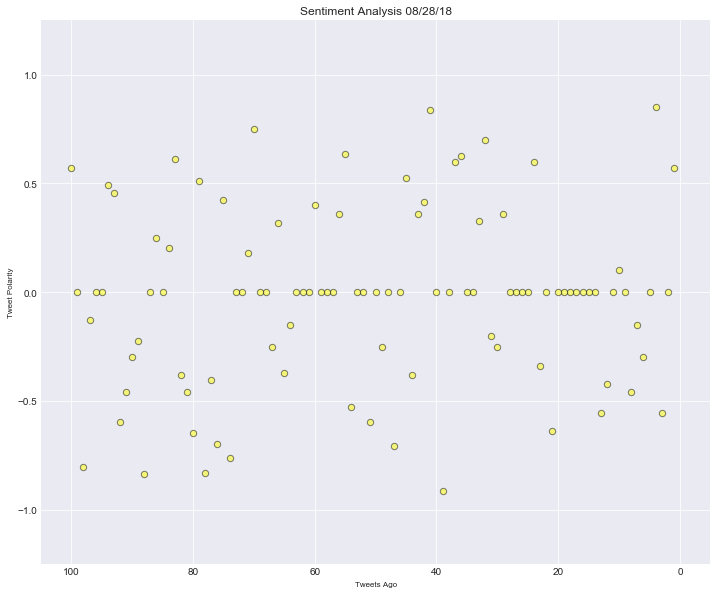

In [42]:
import time
todaysdate = time.strftime("%m/%d/%y")

fix, ax  = plt.subplots(figsize =(12,10))

sns.set_style("darkgrid")

plt.ylim(-1.25,1.25)
plt.xlim(105,-5)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Tweets Ago", fontsize=8)
plt.ylabel("Tweet Polarity", fontsize=8)
plt.title("Sentiment Analysis " + todaysdate, fontsize=12)
plt.scatter(x_ny, y_ny, marker="o", s=40, facecolors="yellow", edgecolors="black", alpha=0.5, label='NY Times')
plt.scatter(x_bbc, y_bbc, marker="o", s=40, facecolors="green", edgecolors="black", alpha=0.5, label='BBC')
plt.scatter(x_cbs, y_cbs, marker="o", s=40, facecolors="red", edgecolors="black", alpha=0.5, label='CBS')
plt.scatter(x_cnn, y_cnn, marker="o", s=40, facecolors="blue", edgecolors="black", alpha=0.5, label='CNN')
plt.scatter(x_fox, y_fox, marker="o", s=40, facecolors="lightcoral", edgecolors="black", alpha=0.5, label="FOX")
plt.legend(title="Tweet Sources", fontsize=10, bbox_to_anchor=(1,1), loc=2, borderaxespad=2)

plt.savefig('News_sentiment_scatterplot.png')

plt.show()

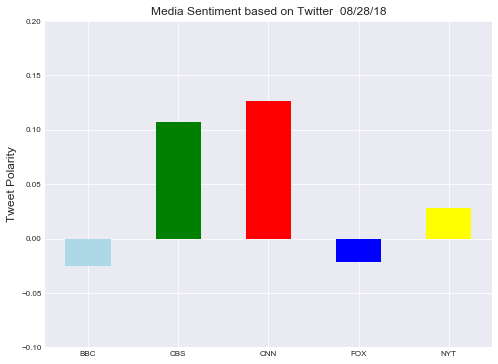

In [36]:
#Calculating compound average for tweet polarity

y_bbc = np.mean(results_list[0]["Compound"])
#x_bbc = results_list[0]["Text"]

#CBS
y_cbs = np.mean(results_list[1]["Compound"])
#x_cbs = results_list[1]["Number"]

#CNN
y_cnn = np.mean(results_list[2]["Compound"])
#x_cnn = results_list[2]["Number"]

#FOXNews
y_fox = np.mean(results_list[3]["Compound"])
#x_fox = results_list[3]["Number"]

#nytimes
y_nytimes = np.mean(results_list[4]["Compound"])
#x_nyt = results_list[4]["Number"]

y_cities = [y_bbc, y_cbs, y_cnn, y_fox, y_nytimes]
colors = ["lightblue","green","red","blue","yellow"]
media_names = ["BBC", "CBS", "CNN", "FOX", "NYT"]
target_users = ("@BBC","@CBS","@CNN","@FoxNews","@nytimes")

# Tweet Texts
tweet_texts = []

# List to hold results
results_list = []

#Loop through all news organizations
for target in target_users:

   # Variables for holding sentiments
   compound_list = []
   positive_list = []
   negative_list = []
   neutral_list = []
   number_list = []
   tweet_list = []

   counter = 0

   # Create a loop to iteratively run API requests
   for x in range(1, 6):

       # Get all tweets from home feed (for each page specified)
       public_tweets = api.user_timeline(target, page=x)

       # Loop through all tweets
       for tweet in public_tweets:

           # Run Vader Analysis on each tweet
           results = analyzer.polarity_scores(tweet["text"])
           compound = results["compound"]
           pos = results["pos"]
           neu = results["neu"]
           neg = results["neg"]

           # Add each value to the appropriate list
           compound_list.append(compound)
           positive_list.append(pos)
           negative_list.append(neg)
           neutral_list.append(neu)
           counter += 1
           number_list.append(counter)
           tweet_list.append(tweet["text"])

   sent ={
       "User": target,
       "Compound": compound_list,
       "Positive": positive_list,
       "Neutral": negative_list,
       "Negative": neutral_list,
       "Tweet Count": len(compound_list),
       "Number": number_list,
       "Tweets": tweet_list
       }

   # Append news tweets results to 'results_list'
   results_list.append(sent)

import time
todaysdate = time.strftime("%m/%d/%y")

fig, ax  = plt.subplots(figsize =(8,6))

sns.set_style("dark")
ax.grid(False)

plt.ylim(-.1,.2)
#plt.xlim(105,-5)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.ylabel("Tweet Polarity", fontsize=12)
plt.title("Media Sentiment based on Twitter  " +  todaysdate, fontsize=12)

y = plt.bar(media_names, y_cities, color=colors, align="center", width=.5)

# Setting the grid
plt.grid(True)

plt.savefig('News_Media_Sentiment_barchart.png')

plt.show()

